# Lesson 6 Assignment - Advertising Sales Regression

## Author - Dustin Burnham



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy

In [2]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(np.mean(x))
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

In [3]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


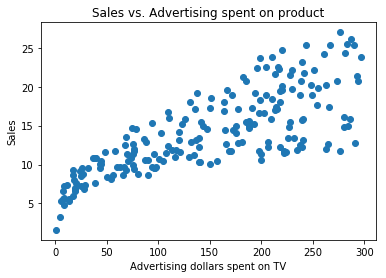

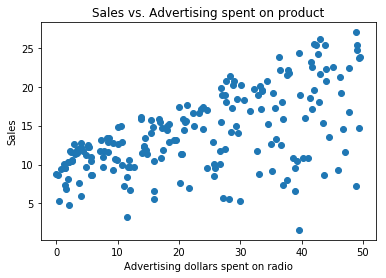

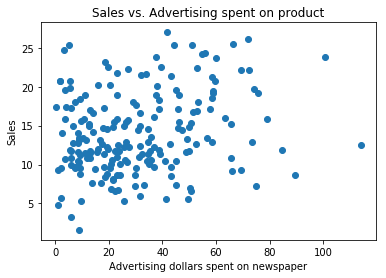

In [4]:
def scatter_plot(df):
    independent = df.columns[:-1]
    dependent = df['sales']
    for col in independent:
        plt.scatter(df[col], dependent)
        plt.xlabel('Advertising dollars spent on ' + col)
        plt.ylabel('Sales')
        plt.title("Sales vs. Advertising spent on product")
        plt.show()

scatter_plot(ad_data)

Model 1: TV

Slope: [[1.36326354]]
Intercept: [23.2585713]
Root mean squared error:  12024.405562143209
R2 score:  0.5312986808849984


/Users/dusty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/dusty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


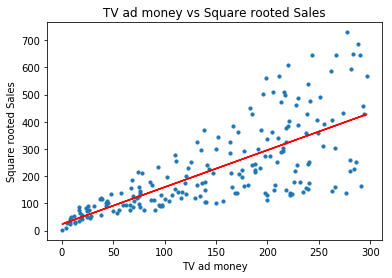

In [5]:
TV = ad_data['TV']
sales = ad_data['sales']**2

x = TV.as_matrix().reshape(-1,1)
y = sales.as_matrix().reshape(-1,1)

regression_model = LinearRegression()

regression_model.fit(x, y)

y_predicted = regression_model.predict(x)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# data points
plt.scatter(x, y, s=10)
plt.xlabel('TV ad money')
plt.ylabel('Square rooted Sales')
plt.title('TV ad money vs Square rooted Sales')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

Transform TV back from squared

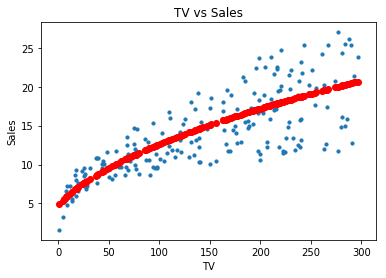

In [6]:
# data points
plt.scatter(ad_data['TV'], ad_data['sales'], s=10)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

# predicted values
plt.scatter(ad_data['TV'], y_predicted**(1/2), color='r')
plt.show()

/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Text(0.5,1,'TV vs Sales')

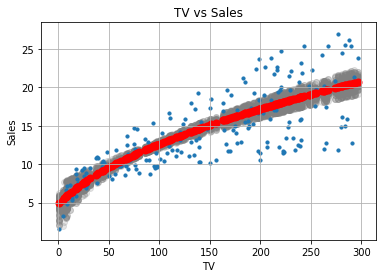

In [148]:
# Resample with replacement each row
boot_slopes = []
boot_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # Create a sampling of the rows, same size, with replacement
    #x_samp = np.array(pd.DataFrame(x).sample(frac = 1, replace=True))
    #y_samp = np.array(pd.DataFrame(y).sample(frac = 1, replace = True))
    
    samp = ad_data[['sales', 'TV']].sample(frac = 1, replace = True)
    TV_samp = samp['TV']
    sales_samp = samp['sales']**2

    x_samp = TV_samp.as_matrix().reshape(-1,1)
    y_samp = sales_samp.as_matrix().reshape(-1,1)
    
    regression_model = LinearRegression()

    regression_model.fit(x_samp, y_samp)

    y_predicted_temp = regression_model.predict(x_samp)
    
    # Get the intercept and slope, and record it
    boot_interc.append(regression_model.intercept_.item())
    boot_slopes.append(regression_model.coef_.item())
    
    # Plot a greyed out line
    plt.scatter(x_samp, y_predicted_temp**(1/2), color='grey', alpha=0.2)

# Add points
plt.scatter(ad_data['TV'], ad_data['sales'], s=10)
plt.scatter(x, y_predicted**(1/2), linewidth=2, color='red')
plt.grid(True)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

In [149]:
slopes = sorted(boot_slopes)
intercepts = sorted(boot_interc)

ci_slopes = scipy.percentile(slopes, [5, 95])
ci_intercepts = scipy.percentile(intercepts, [5, 95])

print('90% CI for slopes: ', ci_slopes)
print('90% CI for intercepts: ', ci_intercepts)

90% CI for slopes:  [1.15585085 1.55200493]
90% CI for intercepts:  [ 6.54960896 35.62373526]


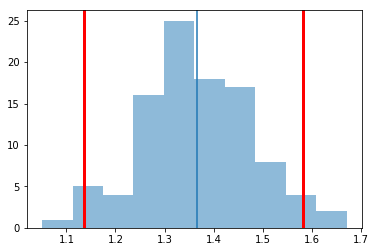

In [150]:
plot_hist(slopes)

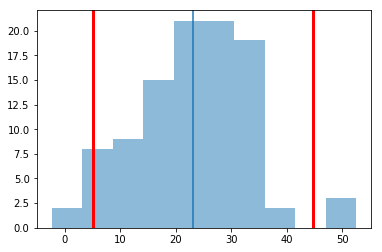

In [151]:
plot_hist(intercepts)

### Interpretation of coefficients and intercepts:
Intercepts:  When 0 is spent on TV, the square root of sales is around 23 milion dollars.

Coefficient:  For every 1 million dollars spent on tv ads, the square root of sales will increase by 1.4 million dollars.

Model 2: Radio

Slope: [[0.20249578]]
Intercept: [9.3116381]
Root mean squared error:  18.09239774512544
R2 score:  0.33203245544529525


/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


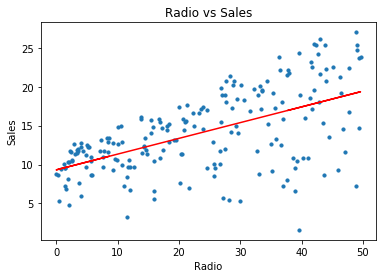

In [152]:
radio = ad_data['radio']
sales = ad_data['sales']

x = radio.as_matrix().reshape(-1,1)
y = sales.as_matrix().reshape(-1,1)

regression_model = LinearRegression()

regression_model.fit(x, y)

y_predicted = regression_model.predict(x)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# data points
plt.scatter(x, y, s=10)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Text(0.5,1,'Radio vs Sales')

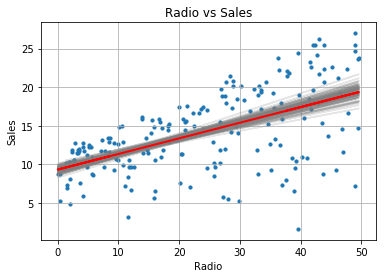

In [153]:
# Resample with replacement each row
boot_slopes = []
boot_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # Create a sampling of the rows, same size, with replacement
    #x_samp = np.array(pd.DataFrame(x).sample(frac = 1, replace=True))
    #y_samp = np.array(pd.DataFrame(y).sample(frac = 1, replace = True))
    
    samp = ad_data[['sales', 'radio']].sample(frac = 1, replace = True)
    TV_samp = samp['radio']
    sales_samp = samp['sales']

    x_samp = TV_samp.as_matrix().reshape(-1,1)
    y_samp = sales_samp.as_matrix().reshape(-1,1)
    
    regression_model = LinearRegression()

    regression_model.fit(x_samp, y_samp)

    y_predicted_temp = regression_model.predict(x_samp)
    
    # Get the intercept and slope, and record it
    boot_interc.append(regression_model.intercept_.item())
    boot_slopes.append(regression_model.coef_.item())
    
    # Plot a greyed out line
    plt.plot(x_samp, y_predicted_temp, color='grey', alpha=0.2)

# Add points
plt.scatter(ad_data['radio'], ad_data['sales'], s=10)
plt.plot(x, y_predicted, linewidth=2, color='red')
plt.grid(True)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

In [154]:
slopes = sorted(boot_slopes)
intercepts = sorted(boot_interc)

ci_slopes = scipy.percentile(slopes, [5, 95])
ci_intercepts = scipy.percentile(intercepts, [5, 95])

print('90% CI for slopes: ', ci_slopes)
print('90% CI for intercepts: ', ci_intercepts)

90% CI for slopes:  [0.1703239  0.23743945]
90% CI for intercepts:  [8.60448388 9.92136005]


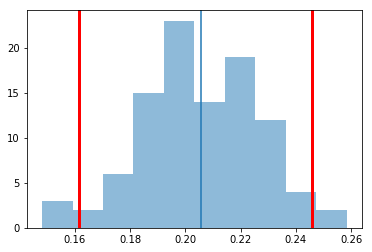

In [155]:
plot_hist(slopes)

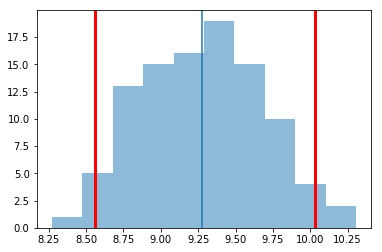

In [156]:
plot_hist(intercepts)

### Interpret the slope and intercept:
Intercept:  When 0 is spent on radio adds, the sales will be 9.3 million dollars.

Slope: For every 1 million dollars spent on, the sales will increase by 0.2 million dollars.

Model 3: Newspaper

Slope: [[0.0546931]]
Intercept: [12.35140707]
Root mean squared error:  25.674022720559698
R2 score:  0.05212044544430516


/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


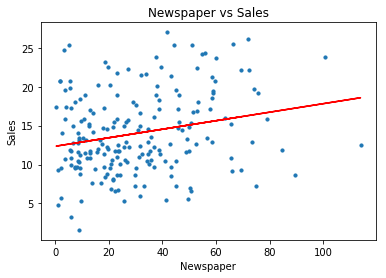

In [157]:
TV = ad_data['newspaper']
sales = ad_data['sales']

x = TV.as_matrix().reshape(-1,1)
y = sales.as_matrix().reshape(-1,1)

regression_model = LinearRegression()

regression_model.fit(x, y)

y_predicted = regression_model.predict(x)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# data points
plt.scatter(x, y, s=10)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


Text(0.5,1,'Newspaper vs Sales')

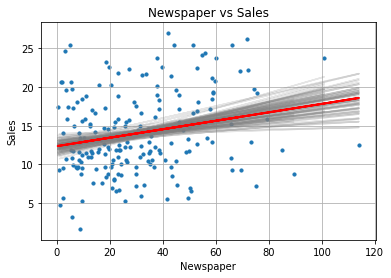

In [158]:
# Resample with replacement each row
boot_slopes = []
boot_interc = []
n_boots = 100
plt.figure()
for _ in range(n_boots):
    # Create a sampling of the rows, same size, with replacement
    #x_samp = np.array(pd.DataFrame(x).sample(frac = 1, replace=True))
    #y_samp = np.array(pd.DataFrame(y).sample(frac = 1, replace = True))
    
    samp = ad_data[['sales', 'newspaper']].sample(frac = 1, replace = True)
    newspaper_samp = samp['newspaper']
    sales_samp = samp['sales']

    x_samp = newspaper_samp.as_matrix().reshape(-1,1)
    y_samp = sales_samp.as_matrix().reshape(-1,1)
    
    regression_model = LinearRegression()

    regression_model.fit(x_samp, y_samp)

    y_predicted_temp = regression_model.predict(x_samp)
    
    # Get the intercept and slope, and record it
    boot_interc.append(regression_model.intercept_.item())
    boot_slopes.append(regression_model.coef_.item())
    
    # Plot a greyed out line
    plt.plot(x_samp, y_predicted_temp, color='grey', alpha=0.2)

# Add points
plt.scatter(ad_data['newspaper'], ad_data['sales'], s=10)
plt.plot(x, y_predicted, linewidth=2, color='red')
plt.grid(True)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

In [159]:
slopes = sorted(boot_slopes)
intercepts = sorted(boot_interc)

ci_slopes = scipy.percentile(slopes, [5, 95])
ci_intercepts = scipy.percentile(intercepts, [5, 95])

print('90% CI for slopes: ', ci_slopes)
print('90% CI for intercepts: ', ci_intercepts)

90% CI for slopes:  [0.02496181 0.08230695]
90% CI for intercepts:  [11.27791715 13.34534179]


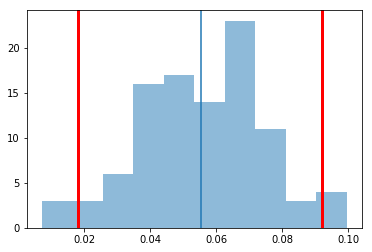

In [160]:
plot_hist(slopes)

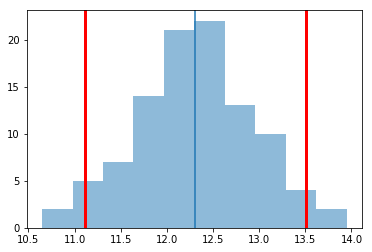

In [161]:
plot_hist(intercepts)

### Interpret slope and intercept:
Intercept:  When 0 is spent on newspaper ads, the sales is 12.35 million dollars.

Slope: For every 1 million spent on newspaper ads, sales will increase by 0.05 million dollars.

### Multiple Regression of TV, Radio, and Newspaper

In [162]:
x = ad_data[['TV', 'radio', 'newspaper']]
x['TV'] = x['TV']**(1/2)
y = ad_data['sales']

/Users/dusty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
#X = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     6770.
Date:                Sun, 12 May 2019   Prob (F-statistic):          2.16e-198
Time:                        22:38:35   Log-Likelihood:                -360.30
No. Observations:                 200   AIC:                             726.6
Df Residuals:                     197   BIC:                             736.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.8838      0.015     57.114      0.0

### Interpret the results:
The coefficient for TV is the largest, so this factor has the largest weight in the model.  This matches the individual regression models that I made that showed TV ads had a large impact on price.  In addition the coefficients for radio is next smallest, and the newspaper is almost zero.  This means radio has some impact, and newspaper has no impact on the sales.  If I were a person in charge, I would invest heavily in TV ads.

Adjusted R-Squared:
The Adjusted R-squared of 0.99 is very near 1, so the model predicts the sales very well.